The purpose of this project was to test our skills in assessing the quality of FASTQ data in its various aspects. In each part, we became familiar with different quality control metrics and methods used to evaluate sequencing data

In [1]:
!pip install -r requirements.txt

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from gzip import open as gzopen
import matplotlib.patches as patches
from Bio import SeqIO
import statistics as stats




 Read the FASTQ File

In [2]:


def read_fastq(file_path):
    return list(SeqIO.parse(file_path, "fastq"))

reads = read_fastq("Module 1 Project\degraded_quality.fastq")
print(f"Total reads: {len(reads)}")


Total reads: 1000


 Quality Score Distribution

Average Phred Quality Score: 29.50


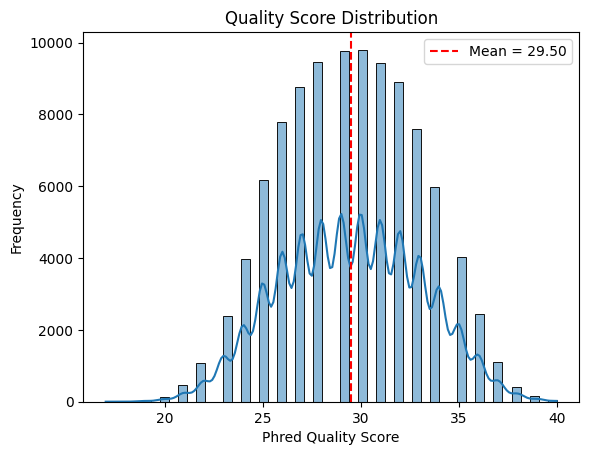

In [3]:


def plot_quality_distribution(reads):
    all_scores = []
    for record in reads:
        all_scores.extend(record.letter_annotations["phred_quality"])
    
    mean_quality = np.mean(all_scores)
    print(f"Average Phred Quality Score: {mean_quality:.2f}")
    
    sns.histplot(all_scores, bins=50, kde=True)
    plt.title("Quality Score Distribution")
    plt.xlabel("Phred Quality Score")
    plt.ylabel("Frequency")
    plt.axvline(mean_quality, color='red', linestyle='--', label=f'Mean = {mean_quality:.2f}')
    plt.legend()
    plt.show()

plot_quality_distribution(reads)


Average Phred Quality Score per Read: 29.50


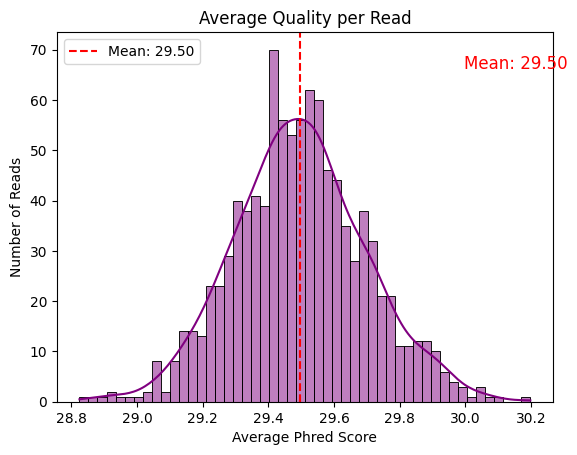

In [4]:


def plot_read_average_quality(reads):
    avg_scores = []
    for record in reads:
        scores = record.letter_annotations["phred_quality"]
        avg = sum(scores) / len(scores)
        avg_scores.append(avg)

    mean_quality = sum(avg_scores) / len(avg_scores)
    print(f"Average Phred Quality Score per Read: {mean_quality:.2f}")

    sns.histplot(avg_scores, bins=50, kde=True, color="purple")
    
    plt.axvline(mean_quality, color='red', linestyle='--', label=f'Mean: {mean_quality:.2f}')
    
    plt.text(mean_quality + 0.5, max(plt.ylim()) * 0.9, f'Mean: {mean_quality:.2f}', color='red', fontsize=12)

    plt.title("Average Quality per Read")
    plt.xlabel("Average Phred Score")
    plt.ylabel("Number of Reads")
    plt.legend()
    plt.show()

plot_read_average_quality(reads)


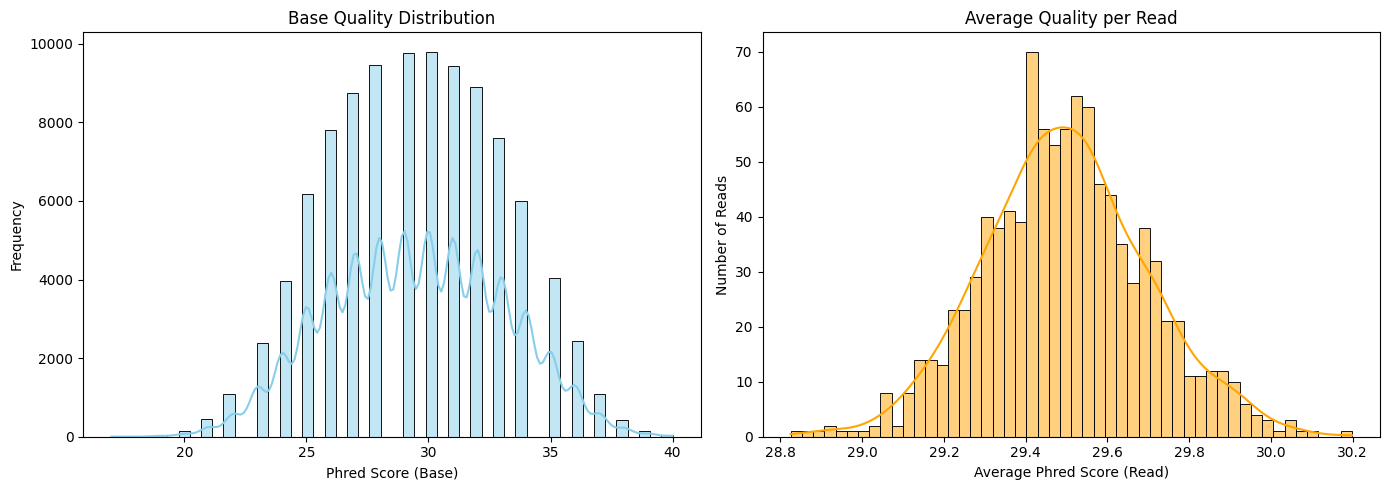


üîç ÿ™ÿ≠ŸÑ€åŸÑ ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß (Base-level):
- ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ®ÿßÿ≤Ÿáÿß: 99906
- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ: 29.50
- ŸÖ€åÿßŸÜŸá: 29.00
- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: 3.55

üîç ÿ™ÿ≠ŸÑ€åŸÑ ⁄©€åŸÅ€åÿ™ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß (Read-level):
- ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß: 1000
- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ: 29.50
- ŸÖ€åÿßŸÜŸá: 29.49
- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: 0.20

‚ö†Ô∏è ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ÿ®ÿß ⁄©€åŸÅ€åÿ™ Ÿæÿß€å€åŸÜ (ŸÖ€åÿßŸÜ⁄Ø€åŸÜ < 20): 0.00%

üìå ÿ™ŸÅÿ≥€åÿ±:
‚òëÔ∏è ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß ŸÇÿßÿ®ŸÑ ŸÇÿ®ŸàŸÑ ÿßÿ≥ÿ™ÿå ŸàŸÑ€å ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿØÿ± ÿ®ÿ±ÿÆ€å ŸÖŸàŸÇÿπ€åÿ™‚ÄåŸáÿß ⁄©ÿßŸáÿ¥ ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ÿØ.
‚úÖ ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ⁄©ŸÖ‚Äå⁄©€åŸÅ€åÿ™ ⁄©ŸÖÿ™ÿ± ÿßÿ≤ €µŸ™ ÿßÿ≥ÿ™ÿå ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá €å⁄© ŸÅÿß€åŸÑ ÿ™ŸÖ€åÿ≤ Ÿà ŸÇÿßÿ®ŸÑ ÿßÿπÿ™ŸÖÿßÿØ.


In [5]:


def read_fastq(file_path):
    return list(SeqIO.parse(file_path, "fastq"))


def compare_and_analyze_quality(reads):
    base_scores = []
    read_avg_scores = []

    for record in reads:
        scores = record.letter_annotations["phred_quality"]
        base_scores.extend(scores)
        avg = sum(scores) / len(scores)
        read_avg_scores.append(avg)

   
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(base_scores, bins=50, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title("Base Quality Distribution")
    axes[0].set_xlabel("Phred Score (Base)")
    axes[0].set_ylabel("Frequency")

    sns.histplot(read_avg_scores, bins=50, kde=True, ax=axes[1], color='orange')
    axes[1].set_title("Average Quality per Read")
    axes[1].set_xlabel("Average Phred Score (Read)")
    axes[1].set_ylabel("Number of Reads")

    plt.tight_layout()
    plt.show()

  
    print("\nüîç ÿ™ÿ≠ŸÑ€åŸÑ ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß (Base-level):")
    base_mean = stats.mean(base_scores)
    base_median = stats.median(base_scores)
    base_std = stats.stdev(base_scores)

    print(f"- ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ®ÿßÿ≤Ÿáÿß: {len(base_scores)}")
    print(f"- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ: {base_mean:.2f}")
    print(f"- ŸÖ€åÿßŸÜŸá: {base_median:.2f}")
    print(f"- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: {base_std:.2f}")

    print("\nüîç ÿ™ÿ≠ŸÑ€åŸÑ ⁄©€åŸÅ€åÿ™ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß (Read-level):")
    read_mean = stats.mean(read_avg_scores)
    read_median = stats.median(read_avg_scores)
    read_std = stats.stdev(read_avg_scores)

    print(f"- ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß: {len(read_avg_scores)}")
    print(f"- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ: {read_mean:.2f}")
    print(f"- ŸÖ€åÿßŸÜŸá: {read_median:.2f}")
    print(f"- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: {read_std:.2f}")

    
    low_quality_reads = [score for score in read_avg_scores if score < 20]
    percent_low = len(low_quality_reads) * 100 / len(read_avg_scores)
    print(f"\n‚ö†Ô∏è ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ÿ®ÿß ⁄©€åŸÅ€åÿ™ Ÿæÿß€å€åŸÜ (ŸÖ€åÿßŸÜ⁄Ø€åŸÜ < 20): {percent_low:.2f}%")


    print("\nüìå ÿ™ŸÅÿ≥€åÿ±:")
    if base_mean >= 30:
        print("‚úÖ ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß ÿ®ÿ≥€åÿßÿ± ÿÆŸàÿ® ÿßÿ≥ÿ™ (ŸÖ€åÿßŸÜ⁄Ø€åŸÜ Phred ‚â• 30). ÿØÿßÿØŸá‚ÄåŸáÿß ÿ®ÿ±ÿß€å ÿ™ÿ≠ŸÑ€åŸÑ‚ÄåŸáÿß€å ÿ®ÿπÿØ€å ŸÖŸÜÿßÿ≥ÿ® Ÿáÿ≥ÿ™ŸÜÿØ.")
    elif base_mean >= 25:
        print("‚òëÔ∏è ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß ŸÇÿßÿ®ŸÑ ŸÇÿ®ŸàŸÑ ÿßÿ≥ÿ™ÿå ŸàŸÑ€å ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿØÿ± ÿ®ÿ±ÿÆ€å ŸÖŸàŸÇÿπ€åÿ™‚ÄåŸáÿß ⁄©ÿßŸáÿ¥ ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥ÿØ.")
    else:
        print("‚ö†Ô∏è ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß Ÿæÿß€å€åŸÜ ÿßÿ≥ÿ™ Ÿà ÿ™Ÿàÿµ€åŸá ŸÖ€å‚Äåÿ¥ŸàÿØ ÿ®ÿßÿ≤ÿ®€åŸÜ€å ÿßŸÜÿ¨ÿßŸÖ ÿ¥ŸàÿØ €åÿß ÿßÿ≤ ÿßÿ®ÿ≤ÿßÿ±Ÿáÿß€å trimming ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿ¥ŸàÿØ.")

    if percent_low < 5:
        print("‚úÖ ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ⁄©ŸÖ‚Äå⁄©€åŸÅ€åÿ™ ⁄©ŸÖÿ™ÿ± ÿßÿ≤ €µŸ™ ÿßÿ≥ÿ™ÿå ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá €å⁄© ŸÅÿß€åŸÑ ÿ™ŸÖ€åÿ≤ Ÿà ŸÇÿßÿ®ŸÑ ÿßÿπÿ™ŸÖÿßÿØ.")
    elif percent_low < 15:
        print("‚òëÔ∏è ÿØÿ±ÿµÿØ ŸÖÿ™Ÿàÿ≥ÿ∑€å ÿßÿ≤ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß ⁄©€åŸÅ€åÿ™ Ÿæÿß€å€åŸÜ ÿØÿßÿ±ŸÜÿØÿå ÿ®ÿ±ÿ±ÿ≥€å trimming ÿ™Ÿàÿµ€åŸá ŸÖ€å‚Äåÿ¥ŸàÿØ.")
    else:
        print("‚ö†Ô∏è ÿ™ÿπÿØÿßÿØ ÿ≤€åÿßÿØ€å ÿßÿ≤ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß ⁄©€åŸÅ€åÿ™ Ÿæÿß€å€åŸÜ ÿØÿßÿ±ŸÜÿØ. ÿ®Ÿáÿ™ÿ± ÿßÿ≥ÿ™ ŸÅ€åŸÑÿ™ÿ±⁄Øÿ∞ÿßÿ±€å €åÿß QC ŸÖÿ¨ÿØÿØ ÿßŸÜÿ¨ÿßŸÖ ÿ¥ŸàÿØ.")


compare_and_analyze_quality(reads)


GC Content Calculation

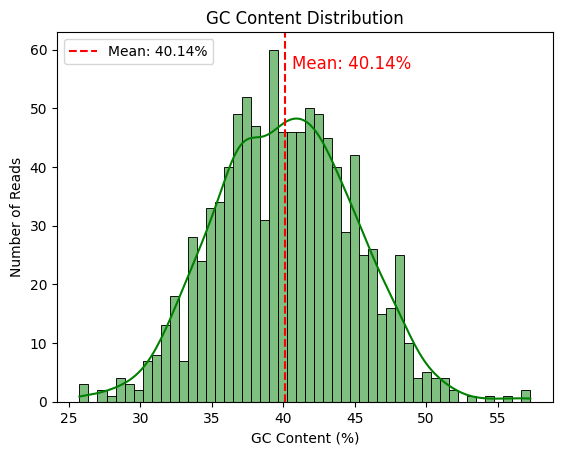


üîç ÿ™ÿ≠ŸÑ€åŸÑ GC Content:
- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ GC Content: 40.14%
- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± GC Content: 4.82%
- ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ÿ®ÿß GC Content ⁄©ŸÖÿ™ÿ± ÿßÿ≤ €≥€∞Ÿ™: 1.50%
- ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ÿ®ÿß GC Content ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ €∑€∞Ÿ™: 0.00%

üìå ÿ™ŸÅÿ≥€åÿ±:
‚úÖ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ GC Content ÿØÿ± ÿ®ÿßÿ≤Ÿá ŸÜÿ±ŸÖÿßŸÑ (40-60Ÿ™) ŸÇÿ±ÿßÿ± ÿØÿßÿ±ÿØ ⁄©Ÿá ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá ⁄©€åŸÅ€åÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿØÿßÿØŸá‚ÄåŸáÿßÿ≥ÿ™.
‚úÖ ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± Ÿæÿß€å€åŸÜ ÿßÿ≥ÿ™ÿå €åÿπŸÜ€å ÿ™Ÿàÿ≤€åÿπ GC ÿ®€åŸÜ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß €å⁄©ŸÜŸàÿßÿÆÿ™ ÿßÿ≥ÿ™.


In [6]:

def calculate_gc_content(reads):
    gc_contents = []
    
    for record in reads:
        seq = record.seq.upper()
        gc_count = seq.count("G") + seq.count("C")
        gc_contents.append(100 * gc_count / len(seq))
    
    mean_gc = stats.mean(gc_contents)
    stdev_gc = stats.stdev(gc_contents)

    sns.histplot(gc_contents, bins=50, kde=True, color='green')
    plt.title("GC Content Distribution")
    plt.xlabel("GC Content (%)")
    plt.ylabel("Number of Reads")

    plt.axvline(mean_gc, color='red', linestyle='--', label=f'Mean: {mean_gc:.2f}%')
    
    plt.text(mean_gc + 0.5, max(plt.ylim()) * 0.9, f'Mean: {mean_gc:.2f}%', color='red', fontsize=12)

    plt.legend()
    plt.show()

    print(f"\nüîç ÿ™ÿ≠ŸÑ€åŸÑ GC Content:")
    print(f"- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ GC Content: {mean_gc:.2f}%")
    print(f"- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± GC Content: {stdev_gc:.2f}%")

    low_gc_count = len([gc for gc in gc_contents if gc < 30])
    high_gc_count = len([gc for gc in gc_contents if gc > 70])
    
    total_reads = len(gc_contents)
    low_gc_percent = (low_gc_count / total_reads) * 100
    high_gc_percent = (high_gc_count / total_reads) * 100

    print(f"- ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ÿ®ÿß GC Content ⁄©ŸÖÿ™ÿ± ÿßÿ≤ €≥€∞Ÿ™: {low_gc_percent:.2f}%")
    print(f"- ÿØÿ±ÿµÿØ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß€å ÿ®ÿß GC Content ÿ®€åÿ¥ÿ™ÿ± ÿßÿ≤ €∑€∞Ÿ™: {high_gc_percent:.2f}%")

    print("\nüìå ÿ™ŸÅÿ≥€åÿ±:")
    if 40 <= mean_gc <= 60:
        print("‚úÖ ŸÖ€åÿßŸÜ⁄Ø€åŸÜ GC Content ÿØÿ± ÿ®ÿßÿ≤Ÿá ŸÜÿ±ŸÖÿßŸÑ (40-60Ÿ™) ŸÇÿ±ÿßÿ± ÿØÿßÿ±ÿØ ⁄©Ÿá ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá ⁄©€åŸÅ€åÿ™ ŸÖŸÜÿßÿ≥ÿ® ÿØÿßÿØŸá‚ÄåŸáÿßÿ≥ÿ™.")
    else:
        print("‚ö†Ô∏è ŸÖ€åÿßŸÜ⁄Ø€åŸÜ GC Content ÿÆÿßÿ±ÿ¨ ÿßÿ≤ ÿ®ÿßÿ≤Ÿá ŸÜÿ±ŸÖÿßŸÑ ÿßÿ≥ÿ™ Ÿà ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ŸÜÿ¥ÿßŸÜŸá ÿ¢ŸÑŸàÿØ⁄Ø€å €åÿß ÿÆÿ∑ÿß ÿØÿ± ŸÅÿ±ÿß€åŸÜÿØ ÿ™ŸàÿßŸÑ€å‚Äå€åÿßÿ®€å ÿ®ÿßÿ¥ÿØ.")
    
    if low_gc_percent > 5:
        print("‚ö†Ô∏è ÿØÿ±ÿµÿØ ŸÇÿßÿ®ŸÑ ÿ™Ÿàÿ¨Ÿá€å ÿßÿ≤ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß GC Ÿæÿß€å€åŸÜ (<30Ÿ™) ÿØÿßÿ±ŸÜÿØ ⁄©Ÿá ŸÖ€å‚Äåÿ™ŸàÿßŸÜÿØ ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá Ÿàÿ¨ŸàÿØ ŸÖŸÜÿßÿ∑ŸÇ ÿ®ÿß AT ÿ®ÿßŸÑÿß ÿ®ÿßÿ¥ÿØ.")
    
    if high_gc_percent > 1:
        print("‚ö†Ô∏è ÿØÿ±ÿµÿØ€å ÿßÿ≤ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß ÿØÿßÿ±ÿß€å GC ÿ®ÿßŸÑÿß (>70Ÿ™) Ÿáÿ≥ÿ™ŸÜÿØ ⁄©Ÿá ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ÿ®Ÿá ÿ≥ÿßÿÆÿ™ÿßÿ±Ÿáÿß€å ÿ´ÿßŸÜŸà€åŸá Ÿæÿß€åÿØÿßÿ± ŸÖŸÜÿ¨ÿ± ÿ¥ŸàÿØ €åÿß ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá ÿ¢ŸÑŸàÿØ⁄Ø€å ÿ®ÿßÿ¥ÿØ.")
    
    if stdev_gc > 10:
        print("‚ö†Ô∏è Ÿæÿ±ÿß⁄©ŸÜÿØ⁄Ø€å ÿ≤€åÿßÿØ ÿØÿ± ŸÖŸÇÿßÿØ€åÿ± GC (ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ÿ®ÿßŸÑÿß) ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ⁄©€åŸÅ€åÿ™ ÿØÿßÿØŸá ÿ±ÿß ⁄©ÿßŸáÿ¥ ÿØŸáÿØ.")
    else:
        print("‚úÖ ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± Ÿæÿß€å€åŸÜ ÿßÿ≥ÿ™ÿå €åÿπŸÜ€å ÿ™Ÿàÿ≤€åÿπ GC ÿ®€åŸÜ ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß €å⁄©ŸÜŸàÿßÿÆÿ™ ÿßÿ≥ÿ™.")

calculate_gc_content(reads)


Quality Per Base Position

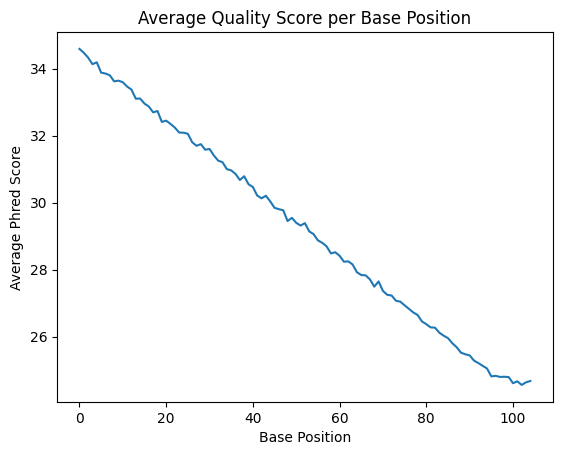


üîç ÿ™ÿ≠ŸÑ€åŸÑ ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß:
- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿßŸÖÿ™€åÿßÿ≤ ⁄©€åŸÅ€åÿ™ ⁄©ŸÑ€å: 29.26
- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ÿßŸÖÿ™€åÿßÿ≤ ⁄©€åŸÅ€åÿ™ ⁄©ŸÑ€å: 3.02
üîΩ ⁄©€åŸÅ€åÿ™ ÿØÿ± ÿßŸÜÿ™Ÿáÿß€å ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿßÿ≥ÿ™.


In [7]:

def quality_per_position(reads):
    max_len = max(len(record) for record in reads)
    pos_scores = [[] for _ in range(max_len)]

    for record in reads:
        for i, score in enumerate(record.letter_annotations["phred_quality"]):
            pos_scores[i].append(score)
    
    avg_scores = [np.mean(scores) if scores else 0 for scores in pos_scores]
    
    stdev_scores = [np.std(scores) if scores else 0 for scores in pos_scores]

    mean_quality = np.mean(avg_scores)
    stdev_quality = np.std(avg_scores)

    plt.plot(avg_scores, label="Average Quality Score")
    plt.title("Average Quality Score per Base Position")
    plt.xlabel("Base Position")
    plt.ylabel("Average Phred Score")
    plt.show()

    print(f"\nüîç ÿ™ÿ≠ŸÑ€åŸÑ ⁄©€åŸÅ€åÿ™ ÿ®ÿßÿ≤Ÿáÿß:")
    print(f"- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿßŸÖÿ™€åÿßÿ≤ ⁄©€åŸÅ€åÿ™ ⁄©ŸÑ€å: {mean_quality:.2f}")
    print(f"- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ÿßŸÖÿ™€åÿßÿ≤ ⁄©€åŸÅ€åÿ™ ⁄©ŸÑ€å: {stdev_quality:.2f}")
    
    if avg_scores[0] < mean_quality:
        print("üîΩ ⁄©€åŸÅ€åÿ™ ÿØÿ± ÿßÿ®ÿ™ÿØÿß€å ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿßÿ≥ÿ™.")
    if avg_scores[-1] < mean_quality:
        print("üîΩ ⁄©€åŸÅ€åÿ™ ÿØÿ± ÿßŸÜÿ™Ÿáÿß€å ÿ≥⁄©ÿßŸÜÿ≥‚ÄåŸáÿß ⁄©ÿßŸáÿ¥ €åÿßŸÅÿ™Ÿá ÿßÿ≥ÿ™.")
    
    

quality_per_position(reads)


Detect Duplicate Reads

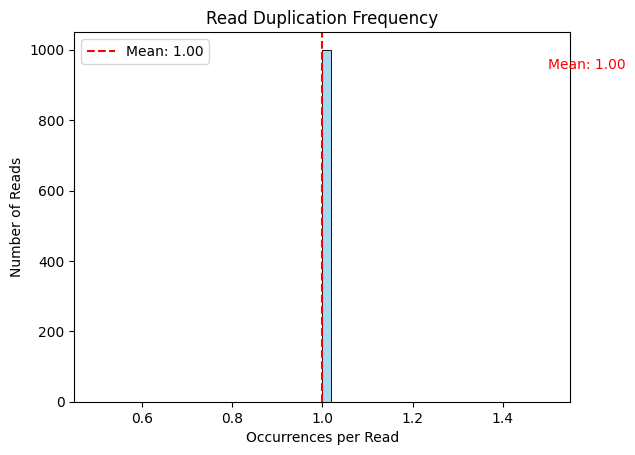

üîç ÿ™ÿ≠ŸÑ€åŸÑ ÿ±€åÿØŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å:
- ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ±€åÿØŸáÿß: 1000
- ÿ™ÿπÿØÿßÿØ ÿ±€åÿØŸáÿß€å €å⁄©ÿ™ÿß: 1000
- ÿ™ÿπÿØÿßÿØ ÿ±€åÿØŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å: 0
- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ™ÿπÿØÿßÿØ ÿ™⁄©ÿ±ÿßÿ± Ÿáÿ± ÿ±€åÿØ: 1.00
- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ÿ™⁄©ÿ±ÿßÿ±: 0.00
üìå ÿ™ŸÅÿ≥€åÿ±: ŸÖ€åÿ≤ÿßŸÜ ÿ™⁄©ÿ±ÿßÿ± Ÿæÿß€å€åŸÜ ÿßÿ≥ÿ™ Ÿà ÿßÿ≠ÿ™ŸÖÿßŸÑÿßŸã ÿ™ÿ£ÿ´€åÿ± ŸÖŸÜŸÅ€å ÿ±Ÿà€å ÿ¢ŸÜÿßŸÑ€åÿ≤ ŸÜŸáÿß€å€å ŸÜÿÆŸàÿßŸáÿØ ÿØÿßÿ¥ÿ™.


In [8]:


def detect_duplicates(reads):
    sequences = [str(record.seq) for record in reads]
    counts = Counter(sequences)
    duplicates = [seq for seq, count in counts.items() if count > 1]

    total_reads = len(reads)
    unique_reads = len(counts)
    duplicate_reads = len(duplicates)
    duplication_counts = list(counts.values())
    mean_duplication = stats.mean(duplication_counts)
    stdev_duplication = stats.stdev(duplication_counts)


    sns.histplot(duplication_counts, bins=50, color='skyblue')
    plt.axvline(mean_duplication, color='red', linestyle='--', label=f'Mean: {mean_duplication:.2f}')
    plt.text(mean_duplication + 0.5, max(plt.ylim()) * 0.9, f'Mean: {mean_duplication:.2f}', color='red')
    plt.title("Read Duplication Frequency")
    plt.xlabel("Occurrences per Read")
    plt.ylabel("Number of Reads")
    plt.legend()
    plt.show()

    print(f"üîç ÿ™ÿ≠ŸÑ€åŸÑ ÿ±€åÿØŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å:")
    print(f"- ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿ±€åÿØŸáÿß: {total_reads}")
    print(f"- ÿ™ÿπÿØÿßÿØ ÿ±€åÿØŸáÿß€å €å⁄©ÿ™ÿß: {unique_reads}")
    print(f"- ÿ™ÿπÿØÿßÿØ ÿ±€åÿØŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å: {duplicate_reads}")
    print(f"- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ™ÿπÿØÿßÿØ ÿ™⁄©ÿ±ÿßÿ± Ÿáÿ± ÿ±€åÿØ: {mean_duplication:.2f}")
    print(f"- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ± ÿ™⁄©ÿ±ÿßÿ±: {stdev_duplication:.2f}")

   

    if mean_duplication > 1.5:
        print("üìå ÿ™ŸÅÿ≥€åÿ±: ÿØÿßÿØŸá‚ÄåŸáÿß ŸÖ€åÿ≤ÿßŸÜ ŸÇÿßÿ®ŸÑ ÿ™Ÿàÿ¨Ÿá€å ÿßÿ≤ ÿ±€åÿØŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ÿ±ÿß ŸÜÿ¥ÿßŸÜ ŸÖ€å‚ÄåÿØŸáŸÜÿØ. ÿ®ÿ≥ÿ™Ÿá ÿ®Ÿá ŸÜŸàÿπ ÿ¢ŸÜÿßŸÑ€åÿ≤ ŸÜŸáÿß€å€åÿå ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ŸÑÿßÿ≤ŸÖ ÿ®ÿßÿ¥ÿØ ÿ±€åÿØŸáÿß€å ÿ™⁄©ÿ±ÿßÿ±€å ÿ≠ÿ∞ŸÅ ÿ¥ŸàŸÜÿØ.")
    else:
        print("üìå ÿ™ŸÅÿ≥€åÿ±: ŸÖ€åÿ≤ÿßŸÜ ÿ™⁄©ÿ±ÿßÿ± Ÿæÿß€å€åŸÜ ÿßÿ≥ÿ™ Ÿà ÿßÿ≠ÿ™ŸÖÿßŸÑÿßŸã ÿ™ÿ£ÿ´€åÿ± ŸÖŸÜŸÅ€å ÿ±Ÿà€å ÿ¢ŸÜÿßŸÑ€åÿ≤ ŸÜŸáÿß€å€å ŸÜÿÆŸàÿßŸáÿØ ÿØÿßÿ¥ÿ™.")

detect_duplicates(reads)



 Read Length Distribution


üîç ÿ™ÿ≠ŸÑ€åŸÑ ÿ∑ŸàŸÑ ÿ±€åÿØŸáÿß:
- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ∑ŸàŸÑ ÿ±€åÿØŸáÿß: 99.91 ÿ®ÿßÿ≤
- ŸÖ€åÿßŸÜŸá ÿ∑ŸàŸÑ: 100.00 ÿ®ÿßÿ≤
- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: 3.10
- ÿØÿ±ÿµÿØ ÿ±€åÿØŸáÿß€å ⁄©Ÿàÿ™ÿßŸá‚Äåÿ™ÿ± ÿßÿ≤ €µ€∞ ÿ®ÿßÿ≤: 0.00%
- ÿØÿ±ÿµÿØ ÿ±€åÿØŸáÿß€å ÿ®ŸÑŸÜÿØÿ™ÿ± ÿßÿ≤ €≤€µ€∞ ÿ®ÿßÿ≤: 0.00%


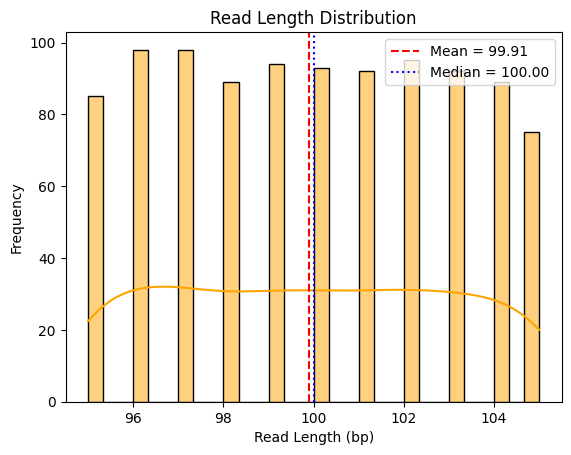


üìå ÿ™ŸÅÿ≥€åÿ±:
‚úÖ ÿß⁄©ÿ´ÿ± ÿ±€åÿØŸáÿß ÿ∑ŸàŸÑ ŸÖŸÜÿßÿ≥ÿ®€å ÿØÿßÿ±ŸÜÿØ.


In [9]:


def read_length_distribution(reads):
    lengths = [len(record.seq) for record in reads]
    
    mean_length = np.mean(lengths)
    median_length = np.median(lengths)
    stdev_length = np.std(lengths)

    print(f"\nüîç ÿ™ÿ≠ŸÑ€åŸÑ ÿ∑ŸàŸÑ ÿ±€åÿØŸáÿß:")
    print(f"- ŸÖ€åÿßŸÜ⁄Ø€åŸÜ ÿ∑ŸàŸÑ ÿ±€åÿØŸáÿß: {mean_length:.2f} ÿ®ÿßÿ≤")
    print(f"- ŸÖ€åÿßŸÜŸá ÿ∑ŸàŸÑ: {median_length:.2f} ÿ®ÿßÿ≤")
    print(f"- ÿßŸÜÿ≠ÿ±ÿßŸÅ ŸÖÿπ€åÿßÿ±: {stdev_length:.2f}")

    short_reads = [l for l in lengths if l < 50]
    long_reads = [l for l in lengths if l > 250]
    percent_short = len(short_reads) * 100 / len(lengths)
    percent_long = len(long_reads) * 100 / len(lengths)

    print(f"- ÿØÿ±ÿµÿØ ÿ±€åÿØŸáÿß€å ⁄©Ÿàÿ™ÿßŸá‚Äåÿ™ÿ± ÿßÿ≤ €µ€∞ ÿ®ÿßÿ≤: {percent_short:.2f}%")
    print(f"- ÿØÿ±ÿµÿØ ÿ±€åÿØŸáÿß€å ÿ®ŸÑŸÜÿØÿ™ÿ± ÿßÿ≤ €≤€µ€∞ ÿ®ÿßÿ≤: {percent_long:.2f}%")

    sns.histplot(lengths, bins=30, kde=True, color='orange')
    plt.title("Read Length Distribution")
    plt.xlabel("Read Length (bp)")
    plt.ylabel("Frequency")

    plt.axvline(mean_length, color='red', linestyle='--', label=f'Mean = {mean_length:.2f}')
    plt.axvline(median_length, color='blue', linestyle=':', label=f'Median = {median_length:.2f}')
    plt.legend()
    plt.show()

    print("\nüìå ÿ™ŸÅÿ≥€åÿ±:")
    if percent_short > 10:
        print("‚ö†Ô∏è ÿ™ÿπÿØÿßÿØ ŸÇÿßÿ®ŸÑ‚Äåÿ™Ÿàÿ¨Ÿá€å ÿßÿ≤ ÿ±€åÿØŸáÿß ⁄©Ÿàÿ™ÿßŸá Ÿáÿ≥ÿ™ŸÜÿØ. ÿß€åŸÜ ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ŸÜÿ¥ÿßŸÜ‚ÄåÿØŸáŸÜÿØŸá ÿ™ÿÆÿ±€åÿ® RNA €åÿß ŸÖÿ¥⁄©ŸÑÿßÿ™ ÿØÿ± ŸÖÿ±ÿ≠ŸÑŸá‚Äå€å library preparation ÿ®ÿßÿ¥ÿØ.")
    else:
        print("‚úÖ ÿß⁄©ÿ´ÿ± ÿ±€åÿØŸáÿß ÿ∑ŸàŸÑ ŸÖŸÜÿßÿ≥ÿ®€å ÿØÿßÿ±ŸÜÿØ.")

    if percent_long > 10:
        print("‚òëÔ∏è ÿØÿ±ÿµÿØ€å ÿßÿ≤ ÿ±€åÿØŸáÿß ÿ®ÿ≥€åÿßÿ± ÿ®ŸÑŸÜÿØ Ÿáÿ≥ÿ™ŸÜÿØ. ÿ®ÿ±ÿ±ÿ≥€å ⁄©€åŸÅ€åÿ™ ÿß€åŸÜ ÿ±€åÿØŸáÿß Ÿà trimming ŸÖŸÖ⁄©ŸÜ ÿßÿ≥ÿ™ ŸÖŸÅ€åÿØ ÿ®ÿßÿ¥ÿØ.")

read_length_distribution(reads)
